In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [119]:
ls

Analytics.ipynb             customers_sample.csv
Homework 1 description.pdf  merchant codes list.xls
Useful liks for HW1.docx    transactional_data.csv


In [120]:
cust = pd.read_csv('customers_sample.csv',sep=';',low_memory=False)
trans = pd.read_csv('transactional_data.csv')
codes = pd.read_excel('merchant codes list.xls')

In [121]:
cust.head()

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,8388.0,46.0,RUSSIA,Kazan,18.02.2017,01.05.2019,0.0,0.0,1.0,0.0
1,17264.0,20.0,RUSSIA,Sevastopol,21.07.2020,03.10.2021,0.0,0.0,1.0,0.0
2,17373.0,31.0,RUSSIA,Kazan,26.02.2016,24.12.2018,0.0,1.0,1.0,0.0
3,26297.0,27.0,RUSSIA,Sevastopol,25.01.2018,16.04.2018,0.0,1.0,1.0,1.0
4,27044.0,41.0,RUSSIA,Sevastopol,17.07.2015,30.07.2016,0.0,0.0,0.0,0.0


In [122]:
trans.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,10/09/2020,5499,418.00,1
1,15453249,10/08/2020,5541,1034.00,1
2,41571339,12/09/2020,5411,57.98,1
3,2044223,28/06/2021,5921,549.40,4
4,33493259,20/07/2020,4121,578.00,2


In [123]:
codes.head()

,STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**,Unnamed: 1,Unnamed: 2
0,MCC CODE,Program Type:,NaN
1,0742,Veterinary Services,NaN
2,0763,Agricultural Cooperatives,NaN
3,0780,Landscaping and Horticultural Services,NaN
4,1520,General Contractor/Residential Building,NaN


In [124]:
cust.isna().sum()

uid1                       1038575
customer_age               1038586
country                    1038575
city_of_living             1038575
registration_dt            1038664
website_last_visit_date    1038800
email                      1038575
has_mob_app                1038575
phone_number               1038575
push                       1038575
dtype: int64

In [125]:
cust.shape

(1048575, 10)

In [126]:
trans.isna().sum()

uid1               0
date_pur           0
mcc_id             0
transaction_amt    0
transaction_qty    0
dtype: int64

In [127]:
codes.isna().sum()

STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**      1
Unnamed: 1                                                                     0
Unnamed: 2                                                                   867
dtype: int64

In [128]:
codes.shape

(882, 3)

In [129]:
codes = codes.rename(columns={'STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**':'mcc_id',
                             'Unnamed: 1':'program_type'})

In [130]:
codes = codes.iloc[1:,:]

In [131]:
codes = codes.iloc[:,0:2]

In [132]:
codes = codes.reset_index(drop=True)

In [133]:
codes.head()

,mcc_id,program_type
0,0742,Veterinary Services
1,0763,Agricultural Cooperatives
2,0780,Landscaping and Horticultural Services
3,1520,General Contractor/Residential Building
4,1711,"Heating, Plumbing, Air Conditioning Contractors"


In [136]:
trans.head()    

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,10/09/2020,5499,418.00,1
1,15453249,10/08/2020,5541,1034.00,1
2,41571339,12/09/2020,5411,57.98,1
3,2044223,28/06/2021,5921,549.40,4
4,33493259,20/07/2020,4121,578.00,2


In [141]:
data = pd.merge(trans,codes,on='mcc_id',how='left')

In [144]:
data.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type
0,14164181,10/09/2020,5499,418.00,1,Miscellaneous Food Stores-Convenience Stores a...
1,15453249,10/08/2020,5541,1034.00,1,Service Stations (with or without Ancillary Se...
2,41571339,12/09/2020,5411,57.98,1,Grocery Stores and Supermarkets
3,2044223,28/06/2021,5921,549.40,4,"Package Stores--Beer, Wine, and Liquor"
4,33493259,20/07/2020,4121,578.00,2,Taxicabs and Limousines


In [145]:
data.isna().sum()

uid1                  0
date_pur              0
mcc_id                0
transaction_amt       0
transaction_qty       0
program_type       1030
dtype: int64

In [146]:
cust = cust.dropna()

In [147]:
cust.shape

(9675, 10)

<AxesSubplot:xlabel='has_mob_app', ylabel='count'>

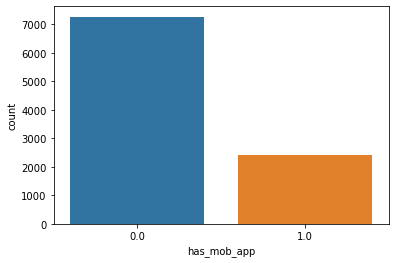

In [148]:
sns.countplot(x=cust['has_mob_app'])

<AxesSubplot:xlabel='phone_number', ylabel='count'>

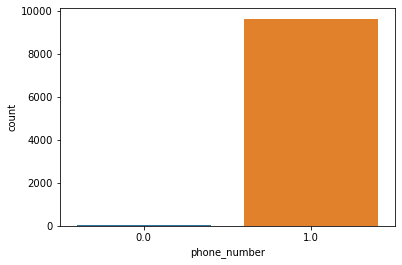

In [149]:
sns.countplot(x=cust['phone_number'])

<AxesSubplot:xlabel='country', ylabel='count'>

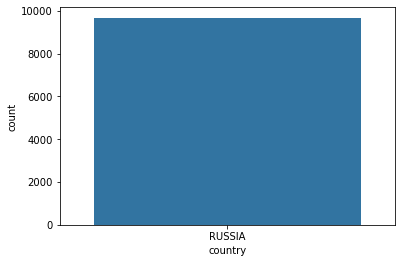

In [150]:
sns.countplot(x=cust.country)

In [155]:
trans_per_program = data.groupby('program_type')['transaction_amt'].sum()

In [157]:
trans_per_program.head()

program_type
Accounting, Auditing, and Bookkeeping Services        91724.92
Advertising Services                                2062133.41
AeroFlot                                            2203577.14
Air Conditioning and Refrigeration Repair Shops         210.00
Air France                                            90538.07
Name: transaction_amt, dtype: float64

In [158]:
cust.isna().sum()

uid1                       0
customer_age               0
country                    0
city_of_living             0
registration_dt            0
website_last_visit_date    0
email                      0
has_mob_app                0
phone_number               0
push                       0
dtype: int64

In [159]:
data2 = pd.merge(data,cust,on='uid1',how='left')

In [160]:
data2.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,14164181,10/09/2020,5499,418.00,1,Miscellaneous Food Stores-Convenience Stores a...,50.0,RUSSIA,Samara,05.12.2017,14.12.2019,1.0,1.0,1.0,1.0
1,15453249,10/08/2020,5541,1034.00,1,Service Stations (with or without Ancillary Se...,63.0,RUSSIA,Perm,07.11.2017,08.05.2019,0.0,0.0,1.0,0.0
2,41571339,12/09/2020,5411,57.98,1,Grocery Stores and Supermarkets,22.0,RUSSIA,Novokuznetsk,13.11.2019,06.09.2020,0.0,1.0,1.0,1.0
3,2044223,28/06/2021,5921,549.40,4,"Package Stores--Beer, Wine, and Liquor",33.0,RUSSIA,Voronezh,13.10.2018,08.05.2020,0.0,0.0,1.0,0.0
4,33493259,20/07/2020,4121,578.00,2,Taxicabs and Limousines,24.0,RUSSIA,Voronezh,30.09.2016,27.07.2018,1.0,0.0,1.0,0.0


<AxesSubplot:>

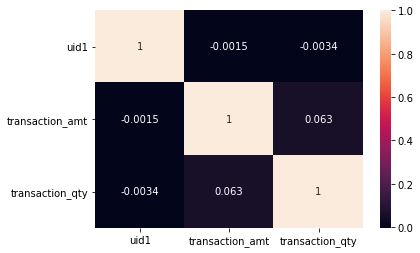

In [162]:
sns.heatmap(data.corr(method='pearson'),annot=True)

In [163]:

from sklearn.cluster import KMeans


import plotly.graph_objects as go

In [164]:
from sklearn.preprocessing import LabelEncoder

In [165]:
le = LabelEncoder()

In [166]:
data2['program_type'] = le.fit_transform(data2['program_type'])

In [168]:
data2['city_of_living'] = le.fit_transform(data2['city_of_living'])

In [171]:
data2.isna().sum()

uid1                           0
date_pur                       0
mcc_id                         0
transaction_amt                0
transaction_qty                0
program_type                   0
customer_age               30328
country                    30328
city_of_living                 0
registration_dt            30328
website_last_visit_date    30328
email                      30328
has_mob_app                30328
phone_number               30328
push                       30328
dtype: int64

In [172]:
data2.shape

(1048575, 15)

In [173]:
data2 = data2.dropna()

In [188]:
X = data2[['transaction_amt','customer_age','city_of_living','has_mob_app']]

Text(0.5, 1.0, 'Elbow Method For Optimal k')

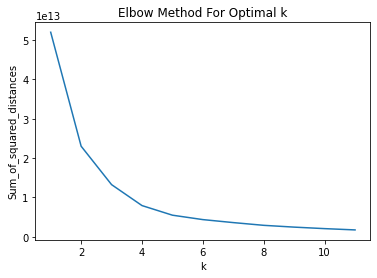

In [189]:
# Implemeting Elbow Method to Determine Optimal Clusters

Sum_of_squared_distances = []
clus_range = range(1,12)
for k in clus_range:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(clus_range, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k') #Showing 3 as optimal Clusters

In [190]:

kmean = KMeans(n_clusters =2,init='k-means++',random_state=2,algorithm='full')

kmean.fit(X)

clus=  kmean.predict(X)

In [191]:
#Showing Centroids

cent = kmean.cluster_centers_


print(cent)

[[7.61225686e+02 3.96799339e+01 9.91530436e+00 3.51078227e-01]
 [5.38451200e+06 6.20000000e+01 0.00000000e+00 0.00000000e+00]]


<AxesSubplot:ylabel='count'>

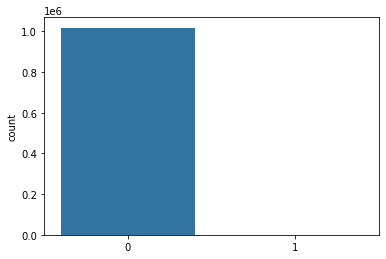

In [192]:
sns.countplot(x=clus)